In [2]:
import healpy as hp 
import sys
import os
import numpy as np
sys.path.append('../')
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2
from taunet.ncm import NoiseModel,NoiseModelGaussian
from taunet.simulation import CMBspectra

In [4]:
ncm = NoiseModel()

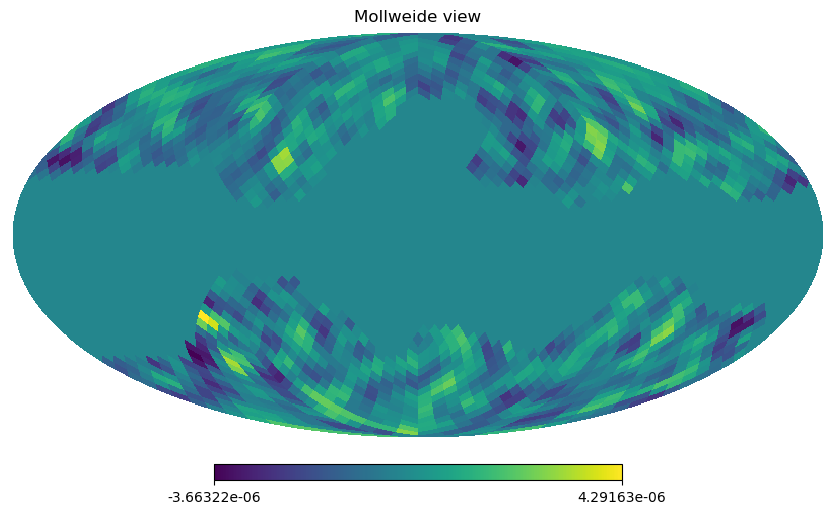

In [6]:
hp.mollview(ncm.noisemap(23,unit='K')[0])

In [7]:
cmb = CMBspectra()

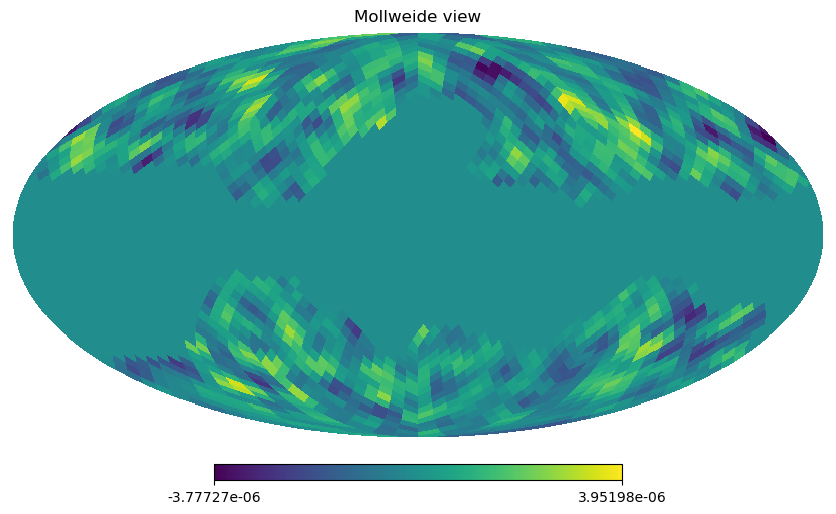

In [11]:
hp.mollview(ncm.noisemap(23,order='ring',unit='K')[0])

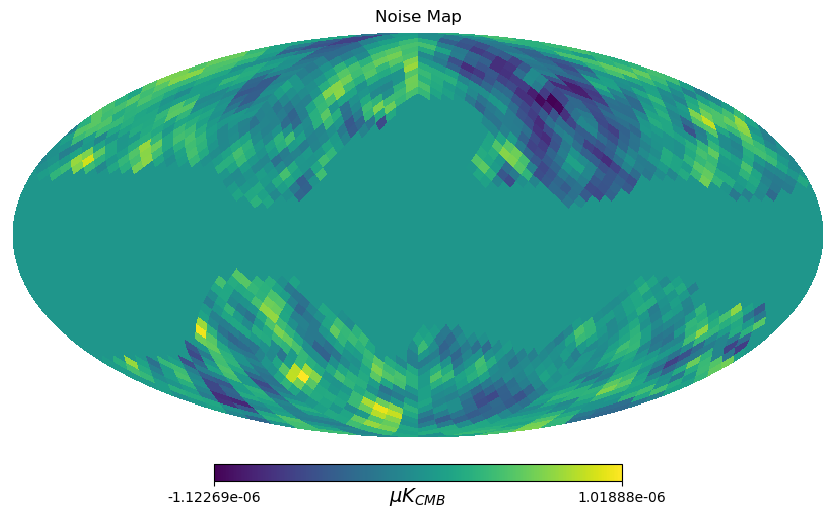

In [8]:
hp.mollview(ncm.noisemap(100,order='nested',unit='K')[0], title='Noise Map', unit=r'$\mu K_{CMB}$', nest=True)

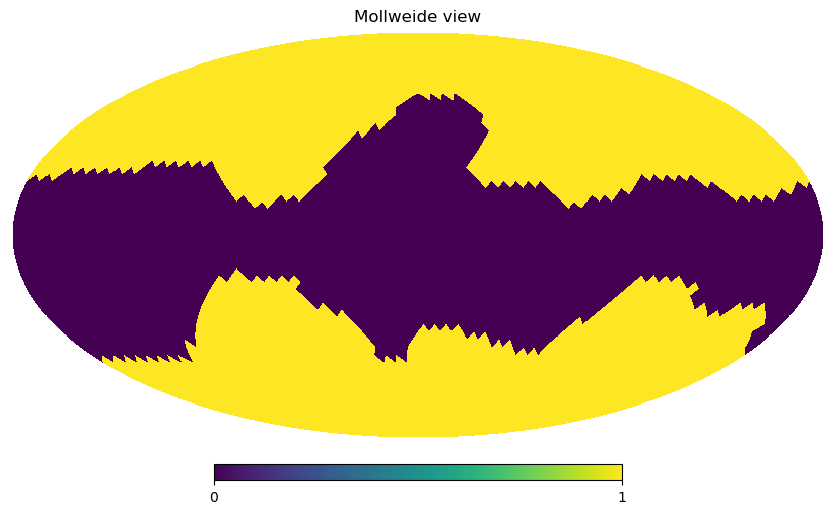

In [9]:
hp.mollview(ncm.polmask('nested'),nest=True)

In [16]:
main_dir = '/marconi/home/userexternal/aidicher/storage/TAUNET'
ncm_dir = os.path.join(main_dir,'NCM')
os.makedirs(ncm_dir,exist_ok=True)

In [17]:
for f in [30,100,143,353]:
    cov = ncm.get_full_ncm(f,unit='K',pad_temp=True,reshape=True,order='nested')
    cov.tofile(os.path.join(ncm_dir,'ncm_{}.bin'.format(f)))

In [15]:
mask = ncm.polmask('nested')

In [16]:
hp.write_map(os.path.join(main_dir,'mask.fits'),[mask,mask,mask],nest=True,overwrite=True)

setting the output map dtype to [dtype('float32'), dtype('float32'), dtype('float32')]


In [5]:
noise_levels = {
    '23': 65,
    '100': 55,
    '143': 60,
    '353': 65,
}

In [6]:
main_dir = '/marconi/home/userexternal/aidicher/storage/TAUNETG'
ncm_dir = os.path.join(main_dir,'NCM')
os.makedirs(ncm_dir,exist_ok=True)

In [7]:
for f in [23,100,143,353]:
    ncm = NoiseModelGaussian(16,noise_levels[str(f)])
    cov = ncm.ncm('K')
    cov.tofile(os.path.join(ncm_dir,'ncm_{}.bin'.format(f)))